# TPC8
# Processamento de datasets EMD
* __data iní­cio__: 2021-11-29
* __data fim__: 2021-12-05
* __autor__: Inês Maria Afonso Barroso, A95787
* __resumo__: Para a realização deste tpc coloquei o dataset na mesma diretoria que este documento. O algoritmo permite ler o ficheiro _emd.csv_ e retirar certas informações deste, através das várias funções criadas. A primeira função é a essencial, pois é nesta que obtemos a informação do ficheiro e a tranformamos numa base de dados com 3 dimensões __bd=[[id, dataEMD, Pnome, Unome, idade, género, morada, modalidade, clube, email, federado,resultado]],....]__ podendo agora manusea-lo de uma melhor forma. Foi feito com auxílio da aula prática e do tpc anterior. Este documento é utilzado como um módulo para poder ser importado no outro ficheiro. 

## Dataset

Para a resolução dos exercícios desta ficha, descarrega o dataset de exames méicos desportivos do site da UC.

### Estrutura do dataset
O dataset tem a seguinte estrutura:

```
_id,index,dataEMD,nome/primeiro,nome/Ãºltimo,idade,gÃ©nero,morada,modalidade,clube,email,federado,resultado
6045074cd77860ac9483d34e,0,2020-02-25,Delgado,Gay,28,F,Gloucester,BTT,ACRroriz,delgado.gay@acrroriz.biz,true,true
6045074ca6adebd591b5d239,1,2019-07-31,Foreman,Prince,34,M,Forestburg,Ciclismo,ACDRcrespos,foreman.prince@acdrcrespos.org,false,true
6045074c221e2fdf430e9ef0,2,2021-01-06,Cheryl,Berger,21,M,Umapine,Basquetebol,Vitoria,cheryl.berger@vitoria.biz,false,true
6045074c529cbdce549d3923,3,2020-11-19,Graves,Goff,29,F,Babb,Andebol,AVCfamalicÃ£o,graves.goff@avcfamalicÃ£o.co.uk,false,false
6045074c3319a0f9e79aad87,4,2019-09-01,Mckay,Bolton,29,F,Chilton,Futebol,ACDRcrespos,mckay.bolton@acdrcrespos.me,false,false
6045074c222607e7520ffd24,5,2019-10-07,Marla,Kelley,22,M,Clarence,Atletismo,AmigosMontanha,marla.kelley@amigosmontanha.tv,false,false

...
```

## Leitura (exercício 1)

Depois de pensares num modelo adequado especifica a função que lê o ficheiro e povoa esse modelo.

Nota: os valores do campo id são demasiado complexos para serem usados na aplicação pelo utilizador.

Ideia: Cria ids novos, mais simples, tipo: emd00001, emd00002, ..., emd00100, ...

In [1]:
# Descreve em texto o teu 
# 
# BdEMD = [EMD]
# EMD = [id, dataEMD, Pnome, Unome, idade, género, morada, modalidade, clube, email, federado,resultado]
#
# Leitura/carregamento da informaçao do ficheiro

def getEMD(linha):
    novaLinha = linha.replace("\n", "") 
    emd = []
    campos = novaLinha.split(",")
    emd.append("emd"+ str(int(campos[1])+1)) #campos[1] = index que ira substituir aquele id todo
    for i in range (2,len(campos)):
        emd.append(campos[i])
    return emd

def lerDataset():
    f = open("emd.csv")
    bd = []
    f.readline() #tirar a linha do cabeçalho
    for linha in f:
        bd.append(getEMD(linha))
    return bd



## Listagem (exercício 2)

Especifica uma função que faça a listagem no monitor dos vários registos de informação por ordem cronológica decrescente.

Tenta dar a forma duma tabela em que as colunas têm todas a mesma dimensão.

In [4]:
# Listagem da informacao
# id | data | nome | apto
# registo[0] | registo [1] | registo [2 e 3] | registo[11]
def ordAno (registo):
    return registo[1]

def listarDataset():
    bd = lerDataset()
    print ("{:<10} {:<15} {:<25} {:<8}".format('Id','Data','Nome','Apto'))
    bd.sort(reverse = True, key = ordAno)
    for registo in bd:
        nome = registo [2] + " " + registo [3]
        print ("{:<10} {:<15} {:<25} {:<8}".format(registo[0],registo [1],nome,registo[11]))


Id         Data            Nome                      Apto    
emd29      2021-03-02      Roberta Joseph            false   
emd24      2021-02-25      Castro Weber              false   
emd94      2021-02-22      Larsen Miles              false   
emd89      2021-02-15      Nunez Guy                 true    
emd99      2021-02-15      Douglas Gay               true    
emd72      2021-02-06      Stefanie Byrd             false   
emd91      2021-01-30      Fowler Madden             false   
emd41      2021-01-26      Levine Sampson            false   
emd54      2021-01-22      Vivian Mercado            true    
emd89      2021-01-20      Anita Lyons               true    
emd31      2021-01-18      Freida Mcneil             false   
emd93      2021-01-13      Bowers Gilliam            false   
emd100     2021-01-13      Glenn Best                true    
emd11      2021-01-12      Frost Dejesus             true    
emd76      2021-01-11      Fields Colon              true    
emd25   

## Consulta de um registo (exercício 3)

Especifica uma função que, dado o id de um EMD, coloca a sua informação no monitor.

In [2]:
# Consulta de um registo
def consultarDataset(id):
    bd = lerDataset()
    stop = False
    i = 0
    while not stop:
        if bd[i][0] == id :
            stop = True
        else:
            i = i+1 
    return bd[i]          


['emd27',
 '2019-03-14',
 'Laverne',
 'Hays',
 '31',
 'F',
 'Coinjock',
 'Badminton',
 'ACRroriz',
 'laverne.hays@acrroriz.biz',
 'true',
 'false']

## Modalidades (exercí­cio 4)

Especifica um função que dá como resultado uma lista de modalidades ordenada alfabeticamente e sem repetições.

In [7]:

# EMD = [id, dataEMD, Pnome, Unome, idade, género, morada, modalidade, clube, email, federado,resultado]
def modalidades():
    bd = lerDataset()
    M = []
    for m in bd :
        if m[7] not in M :
            M.append(m[7])
    M.sort()
    return M
 

['Andebol',
 'Atletismo',
 'BTT',
 'Badminton',
 'Basquetebol',
 'Ciclismo',
 'Dança',
 'Equitação',
 'Esgrima',
 'Futebol',
 'Karaté',
 'Orientação',
 'Parapente',
 'Patinagem',
 'Triatlo']

## Distribuição por modalidade (exercício 5)

Especifica uma função que dá como resultado uma lista de pares indicando quantos EMD estão registados em cada modalidade.

In [3]:

# EMD = [id, dataEMD, Pnome, Unome, idade, género, morada, modalidade, clube, email, federado,resultado]
def distribPorModalidade():
    bd = lerDataset()
    distribuicao = {}
    for registo in bd:
        if registo[7] in distribuicao.keys():
            distribuicao[registo[7]] = distribuicao[registo[7]]+1
        else:
            distribuicao[registo[7]] = 1
    return distribuicao #{modalidade : numero de emd}

    

{'BTT': 29,
 'Ciclismo': 23,
 'Basquetebol': 24,
 'Andebol': 21,
 'Futebol': 21,
 'Atletismo': 16,
 'Equitação': 13,
 'Patinagem': 14,
 'Orientação': 17,
 'Triatlo': 23,
 'Dança': 22,
 'Karaté': 21,
 'Badminton': 24,
 'Esgrima': 15,
 'Parapente': 17}

## Distribuição por clubes (exercício 6)

Especifica uma função que dá como resultado uma lista de pares indicando quantos EMD estão registados por cada clube.

In [5]:
def distribPorClube():
    # EMD = [id, dataEMD, Pnome, Unome, idade, género, morada, modalidade, clube, email, federado,resultado]
    bd = lerDataset()
    distribuicao = {}
    for registo in bd:
        if registo[8] in distribuicao.keys():
            distribuicao[registo[8]] = distribuicao[registo[8]]+1
        else:
            distribuicao[registo[8]] = 1
    return distribuicao #{clube : numero de emd}
   

{'ACRroriz': 37,
 'ACDRcrespos': 41,
 'Vitoria': 32,
 'AVCfamalicão': 31,
 'AmigosMontanha': 35,
 'EDViana': 34,
 'GDGoma': 26,
 'SCBraga': 34,
 'ABCbraga': 30}

## Distribuição por ano (exercício 7)

Especifica uma função que dá como resultado uma lista de pares indicando quantos EMD estão registados por cada ano.

In [8]:
def ordAno (registo):
    return registo[1]

def distribPorAno():
    # EMD = [id, dataEMD, Pnome, Unome, idade, género, morada, modalidade, clube, email, federado,resultado]
    # data : ano-mes-dia, e uma strig, o ano tem 4 numeros logo corresponde str[0:4] o quarto nao e incluido
    bd = lerDataset()
    distribuicao = {}
    bd.sort(reverse = True, key = ordAno) #por do mais recente para o menos
    for registo in bd:
        if registo[1][0:4] in distribuicao.keys():
            distribuicao[registo[1][0:4]] = distribuicao[registo[1][0:4]]+1
        else:
            distribuicao[registo[1][0:4]] = 1
    return distribuicao #{ano : numero de emd}


{'2021': 17, '2020': 138, '2019': 145}

## Distribuição parametrizada (exercí­cio 8)

Especifica uma função que permita calcular uma distribuição por qualquer um dos campos da BD.

In [27]:
# EMD = [id, dataEMD, Pnome, Unome, idade, género, morada, modalidade, clube, email, federado,resultado]
# os que fazem sentido ter distribuicao sao ano, idade, genero, morada talvez, modalidade, clube, federado, resultado
# registo[1]-feito, registo[4], registo[5], registo[6], registo[7]-feito, registo[8]-feito, registo[10], registo[11]
def buscarCampo (campo):
    if campo == "Ano":
        return distrib(1)
    elif campo == "Idade":
        return distrib(4)
    elif campo == "Genero" :
        return distrib(5)
    elif campo == "Morada":
        return distrib(6)
    elif campo == "Modalidade":
        return distrib(7)
    elif campo == "Clube" :
        return distrib(8)
    elif campo == "Federado":
        return distrib(10)
    elif campo == "Resultado" :
        return distrib(11)

def distrib(n):
    bd = lerDataset()
    distribuicao = {}
    if n == 1 :
        return distribPorAno()
    elif n == 7 :
        return distribPorModalidade()
    elif n == 8 :
        return distribPorClube()
    else:
        for registo in bd:
            if registo[n] in distribuicao.keys():
                distribuicao[registo[n]] = distribuicao[registo[n]]+1
            else:
                distribuicao[registo[n]] = 1
        return distribuicao #{campo : numero de emd}


{'ACRroriz': 37,
 'ACDRcrespos': 41,
 'Vitoria': 32,
 'AVCfamalicão': 31,
 'AmigosMontanha': 35,
 'EDViana': 34,
 'GDGoma': 26,
 'SCBraga': 34,
 'ABCbraga': 30}

# Gráficos

## Gráfico da distribuição por modalidade (exercí­cio 9)

Especifica uma função que faz o plot dum gráfico com a distribuição de emd por modalidade.

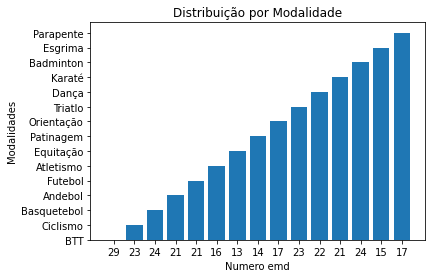

In [18]:
 
def plotDistribPorModalidade():
    import matplotlib.pyplot as plt
    distribuicao = distribPorModalidade()
    # heights of bars
    modalidade = distribuicao.keys()
    height = []
    for m in modalidade :
        height.append(m)   
 
    # labels for bars
    numero_emd = distribuicao.values() 
    x = []
    i = 1
    tick_label = []
    for emd in numero_emd:
        tick_label.append(emd)
        x.append(i)
        i = i+1
 
    # plotting a bar chart
    plt.bar(x,height, tick_label = tick_label, width = 0.8)
    # naming the x-axis
    plt.xlabel('Numero emd')
    # naming the y-axis
    plt.ylabel('Modalidades')
    # plot title
    plt.title('Distribuição por Modalidade')
    plt.show() 
 

## Gráfico duma distribuição qualquer (exercí­cio 10)

Especifica uma função que faz o plot dum gráfico com a distribuição passada como argumento.

Nota: Que parâmetros são necessários para ter uma função genérica que trace o gráico para qualquer distribuição?


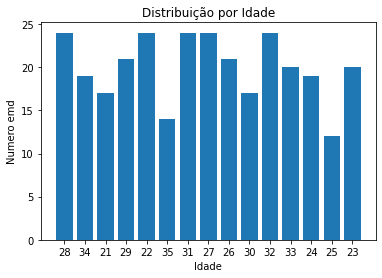

In [31]:
def plotDistrib(campo):
    import matplotlib.pyplot as plt
    if campo == "Modalidade":
        plotDistribPorModalidade()
    elif campo == "Clube":
        distribuicao = buscarCampo(campo)
        # heights of bars
        clubes = distribuicao.keys()
        height = []
        for c in clubes :
            height.append(c)   
 
        # labels for bars
        numero_emd = distribuicao.values() 
        x = []
        i = 1
        tick_label = []
        for emd in numero_emd:
            tick_label.append(emd)
            x.append(i)
            i = i+1
 
        # plotting a bar chart
        plt.bar(x,height, tick_label = tick_label, width = 0.8)
        # naming the x-axis
        plt.xlabel('Numero emd')
        # naming the y-axis
        plt.ylabel('Clubes')
        # plot title
        plt.title('Distribuição por Clube')
        plt.show()

    else:
    # heights of bars
        distribuicao = buscarCampo(campo)
        numero_emd = distribuicao.values()
        height = []
        for emd in numero_emd :
            height.append(emd)   
 
    # labels for bars
        campos = distribuicao.keys() 
        x = []
        i = 1
        tick_label = []
        for c in campos:
            tick_label.append(c)
            x.append(i)
            i = i+1
 
        # plotting a bar chart
        plt.bar(x,height, tick_label = tick_label, width = 0.8)
        # naming the x-axis
        plt.xlabel(campo)
        # naming the y-axis
        plt.ylabel('Numero emd')
        # plot title
        plt.title('Distribuição por ' + campo)
        plt.show()
